In [1]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/opt/anaconda3/lib/python3.8/site-packages/en_core_web_sm -->
/opt/anaconda3/lib/python3.8/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [2]:
# libraries for data pre-processing
import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", 200)

# libraries for NLP
import nltk
from nltk import FreqDist
nltk.download('stopwords')
import re
import spacy
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anushakaran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# read data extracted from google playstore
data = pd.read_csv('/Users/anushakaran/Documents/Python Projects/Grubhub.csv')

In [4]:
reviews = data[['content', 'score']] 

In [5]:
# creating a dataframe with fields - content and score
df = pd.DataFrame(reviews) 

In [6]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

text = df['content']
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output




[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anushakaran/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anushakaran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anushakaran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# clean text data
df['content_clean'] = df['content'].apply(lambda x: clean_text(x))

In [8]:
# add sentiment anaylsis columns
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
 
sid = SentimentIntensityAnalyzer()
df['Sentiments'] =df['content_clean'].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['Sentiments'], axis=1), df['Sentiments'].apply(pd.Series)], axis=1)

df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anushakaran/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,content,score,content_clean,neg,neu,pos,compound
0,"The worst delivery app out there. Overall expensive delivery charges compared to other services and late notifications for cancellation. I am stuck in a snow storm in New Brunswick, NJ and grubhub...",1,worst delivery app overall expensive delivery charge compare service late notification cancellation stick snow storm new brunswick nj grubhub cancel order hour place every time open app kept incre...,0.172,0.747,0.082,-0.6369
1,Enforce ID checking! My order had to be cancelled and refunded (in 5 days) because the drivers don't even bother to check the ID of the correct person waiting for the order and it was delivered so...,1,enforce id check order cancel refunded day driver even bother check id correct person wait order deliver somewhere else customer end without order money already subtract account totally ridiculous...,0.220,0.691,0.089,-0.6013
2,"Used Grubhub+ for months - started very well, but the service has degraded drastically on recent months. ETAs are horribly underestimated, driver assignments seem to border on the absurd, on delay...",1,use grubhub month start well service degrade drastically recent month eta horribly underestimated driver assignment seem border absurd delay issue notification refund customer option competitor ha...,0.271,0.594,0.135,-0.7783
3,"App promoted (in the appstore before I even downloaded it): ""Free delivery on first order with code 'GRUBHUBAPP'"". Put my first order in, entered the promo code at checkout, and got the message ""P...",1,app promote appstore even download free delivery first order code grubhubapp put first order enter promo code checkout get message promo code expire that's bad first impression could possibly make...,0.076,0.756,0.168,0.5106
4,"I've used this app quite a bit in the last few years, and have had my final poor experience. I've canceled Grub Hub plus as there is no significant benefit, and the perks they offer are mostly wor...",1,i've use app quite bite last year final poor experience i've cancel grub hub plus significant benefit perk offer mostly worthless add service fee allow pocket money driver top pay premium service ...,0.168,0.590,0.242,0.4767
...,...,...,...,...,...,...,...
1195,"As far as delivery apps go, grubhub is the most user friendly. They have support right in app and they get back to you really fast. Fees are to be expected, its how they make money, but I don't th...",5,far delivery apps go grubhub user friendly support right app get back really fast fee expect make money think they're bad app easy use self explanatory,0.102,0.641,0.257,0.6486
1196,"I love you guys you are the best , how about a free meal ?",5,love guy best free meal,0.000,0.146,0.854,0.9136
1197,The service is amazing my food is awesome i hope some more great ideas come to mind on this app!please continue service with more great ideas!,5,service amaze food awesome hope great idea come mind app!please continue service great idea,0.000,0.322,0.678,0.9638
1198,eddie in customer service was very helpful and informative....so far so good,5,eddie customer service helpful informative....so far good,0.000,0.467,0.533,0.6908


In [9]:
df.sort_values("neg", ascending = False)[['content', 'neg']].head(20)

,content,neg
628,Scary,1.000
1117,No complaints,1.000
1156,Fire,1.000
724,Not horrible but bad with charges.,0.875
158,I hate your commercials,0.787
966,Not bad so far,0.778
196,Horrible policies,0.778
190,Terrible app,0.756
334,Could stop robotting me ffs,0.750
188,You suck grubhub😂,0.744


In [10]:
df.to_csv('/Users/anushakaran/Documents/Python Projects/Grubhub_Sentiments.csv')

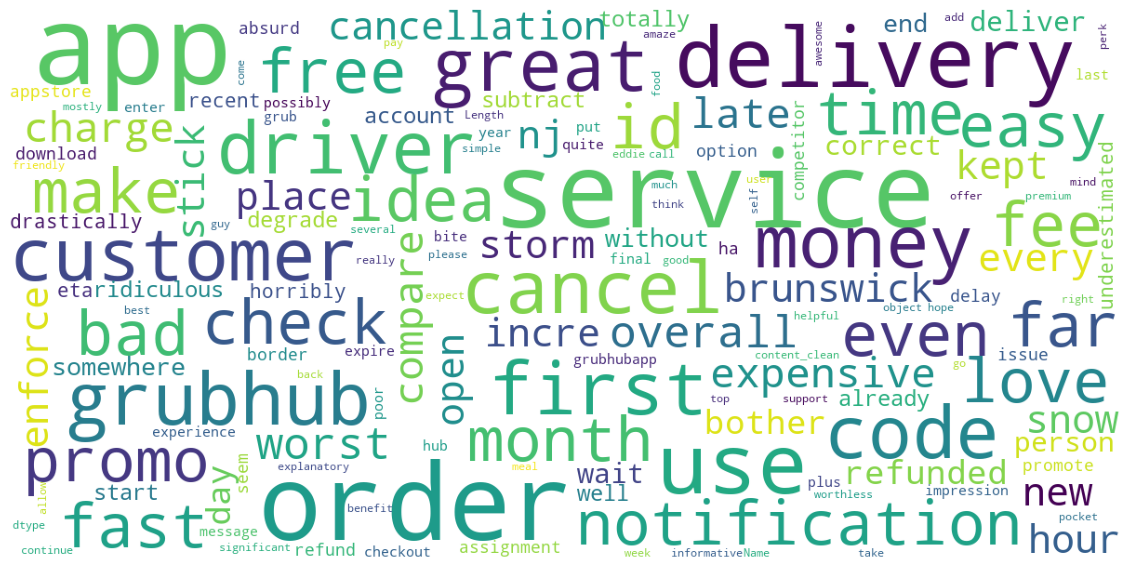

In [11]:
# wordcloud function
 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))
 
    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
 
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['content_clean'])

In [12]:
# tokenize reviews
tokenized_reviews = pd.Series(df['content_clean']).apply(lambda x: x.split())
print(tokenized_reviews[1])

['enforce', 'id', 'check', 'order', 'cancel', 'refunded', 'day', 'driver', 'even', 'bother', 'check', 'id', 'correct', 'person', 'wait', 'order', 'deliver', 'somewhere', 'else', 'customer', 'end', 'without', 'order', 'money', 'already', 'subtract', 'account', 'totally', 'ridiculous', 'happy', 'experience', 'maybe', 'penalize', 'driver', 'minimize', 'problem']


In [13]:
#lemmatize reviews
lemmatizatized_reviews = lemmatization(tokenized_reviews)
print(lemmatizatized_reviews[1]) 

['enforce', 'order', 'refunded', 'day', 'driver', 'correct', 'person', 'order', 'customer', 'end', 'order', 'money', 'account', 'ridiculous', 'happy', 'experience', 'driver', 'minimize', 'problem']


In [14]:
dictionary = corpora.Dictionary(lemmatizatized_reviews)

In [15]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in lemmatizatized_reviews]

In [16]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [17]:
# Printing LDA model topics
lda_model.print_topics()

[(0,
  '0.039*"driver" + 0.025*"order" + 0.022*"great" + 0.020*"instruction" + 0.020*"able" + 0.016*"tip" + 0.015*"meal" + 0.015*"food" + 0.014*"price" + 0.014*"new"'),
 (1,
  '0.103*"fee" + 0.080*"delivery" + 0.031*"tip" + 0.029*"food" + 0.021*"pay" + 0.021*"expensive" + 0.020*"driver" + 0.017*"tax" + 0.016*"charge" + 0.016*"service"'),
 (2,
  '0.092*"order" + 0.059*"app" + 0.039*"time" + 0.028*"restaurant" + 0.026*"food" + 0.022*"grubhub" + 0.019*"good" + 0.016*"delivery" + 0.015*"love" + 0.014*"use"'),
 (3,
  '0.045*"food" + 0.035*"fast" + 0.030*"grubhub" + 0.024*"delivery" + 0.024*"time" + 0.022*"great" + 0.019*"service" + 0.017*"good" + 0.015*"easy" + 0.012*"issue"'),
 (4,
  '0.050*"order" + 0.042*"use" + 0.040*"easy" + 0.038*"app" + 0.038*"restaurant" + 0.035*"time" + 0.026*"food" + 0.015*"good" + 0.015*"driver" + 0.012*"way"'),
 (5,
  '0.053*"delivery" + 0.035*"food" + 0.032*"driver" + 0.031*"people" + 0.021*"use" + 0.019*"restaurant" + 0.018*"work" + 0.017*"item" + 0.016*"optio

In [18]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.152122 -0.072125       1        1  33.453049
1      0.204955 -0.137731       2        1  15.983913
6     -0.061700  0.039314       3        1  15.877549
4     -0.114748 -0.070604       4        1  15.567594
5      0.023551  0.036769       5        1   7.395731
0      0.047110  0.018407       6        1   6.268758
3      0.052953  0.185971       7        1   5.453405, topic_info=         Term        Freq       Total Category  logprob  loglift
70        fee  208.000000  208.000000  Default  30.0000  30.0000
6    delivery  371.000000  371.000000  Default  29.0000  29.0000
386     great  200.000000  200.000000  Default  28.0000  28.0000
17      order  606.000000  606.000000  Default  27.0000  27.0000
20    service  190.000000  190.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
62       free    5.883981   32.876080   Topic7  -4.7499   1.1884
0         app    7.425992  425.039459   Topic7  -4.5172  -1.1383
29     driver    6.242921  221.158554   Topic7  -4.6907  -0.6585
51     option    5.591156   58.964237   Topic7  -4.8010   0.5532
56        use    5.839450  200.539001   Topic7  -4.7575  -0.6274

[453 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
739       4  0.885190        -
232       2  0.265653  ability
232       4  0.708408  ability
650       1  0.354686     able
650       3  0.155175     able
...     ...       ...      ...
185       4  0.091711    wrong
83        4  0.840028     year
83        5  0.064618     year
1090      7  0.740735        👍
1531      5  0.824838        🙏

[611 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 7, 5, 6, 1, 4])

In [19]:
# top unigrams
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df['content_clean'])
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'], ascending=False).head(n=20)

,frequency
order,810
app,539
delivery,423
food,393
get,363
time,351
restaurant,340
use,306
driver,289
fee,280


In [20]:
#top bigrams
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df['content_clean'])
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'], ascending=False).head(n=20)

,frequency
delivery fee,95
customer service,44
use app,40
use grubhub,39
order food,36
service fee,35
get food,35
delivery time,35
grub hub,35
place order,35


In [21]:
#top trigrams
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df['content_clean'])
frequencies = sum(sparse_matrix).toarray()[0]
pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'], ascending=False).head(n=5)

,frequency
delivery fee service,9
service fee delivery,9
app easy use,9
fee service fee,7
delivery fee tip,7
